In [2]:
path = 'C:\IITGN 2nd year\ES 204 Digital Systems\Local Contrast Enhancement of Image\\Unequalized_Hawkes_Bay_NZ.jpg'


In [3]:
import matplotlib.image as Image
import numpy as np
import matplotlib.pyplot as plt

(683, 1024, 3)
(683, 1024)


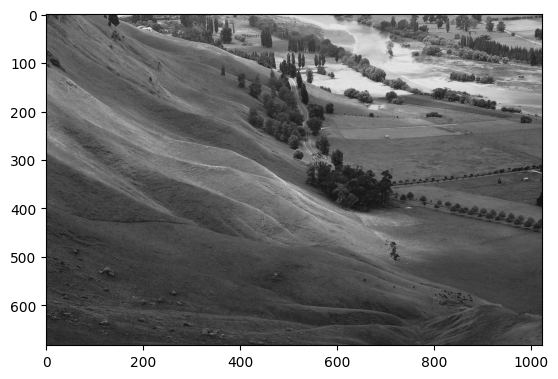

In [12]:
img= Image.imread(path)
print (img.shape)
# image has same rgb value means it is gray scale but stored in the rgb format
gray_img=img[:,:,0]
print (gray_img.shape)

plt.imshow(gray_img, cmap='gray')


In [15]:
gray_img = np.asarray(gray_img)
img_1d = gray_img.flatten()
print(img_1d.shape)

(699392,)


<BarContainer object of 256 artists>

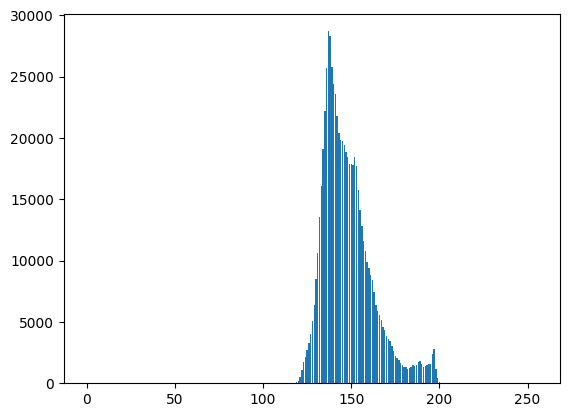

In [26]:
intensity=np.zeros(256)
for pixel in img_1d:
    intensity[pixel]+=1

plt.bar(range(256),intensity)


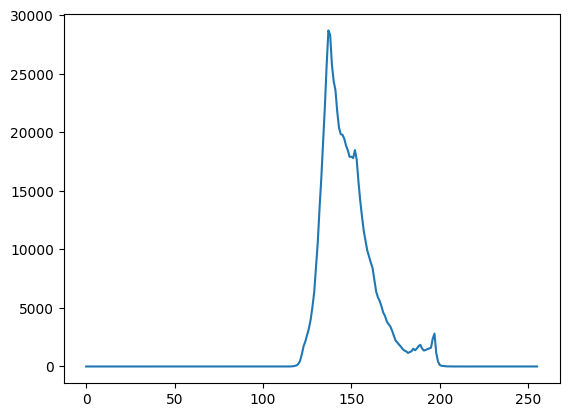

In [47]:
pdf = intensity

plt.plot(pdf)

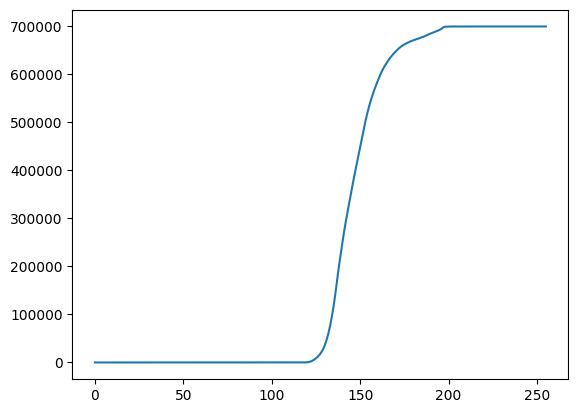

In [48]:
cdf = np.zeros(256)
cdf[0] = pdf[0]
for i in range(1,256):
    cdf[i] = cdf[i-1]+pdf[i]

plt.plot(cdf)

In [63]:
cdf_normalized = (cdf -cdf[cdf>0].min())/(img_1d.size - cdf[cdf>0].min())
print(cdf[cdf>0].min())
histo_equal = np.round(cdf_normalized*(255)).astype(np.uint8)

print(histo_equal)
print(gray_img)
print(histo_equal[gray_img])


1.0
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   2   3
   4   6   8  10  13  17  22  28  35  43  52  63  73  82  91 100 108 115
 122 130 137 144 150 157 163 170 177 183 189 194 199 203 207 210 214 217
 220 223 225 227 229 231 233 235 236 237 238 240 241 241 242 243 243 244
 244 245 245 246 246 247 247 248 249 249 250 250 251 251 252 252 253 254
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 25

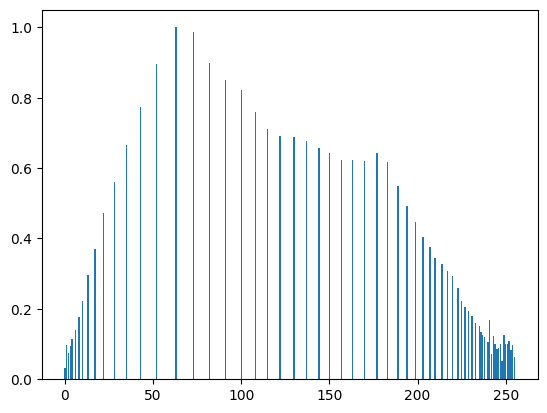

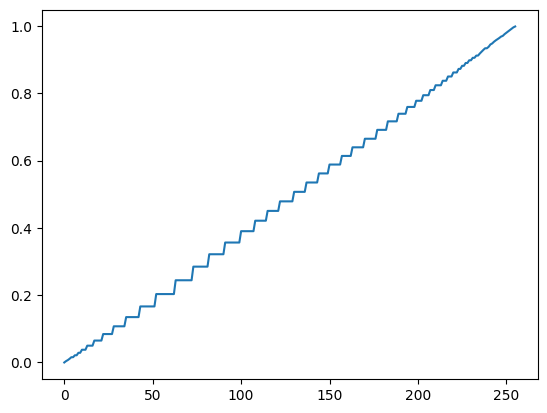

In [78]:
equalized_img = histo_equal[gray_img]

equalized_intensity = np.zeros(256)
for pixel in equalized_img.flatten():
    equalized_intensity[pixel] += 1

cdf_equal = np.zeros(256)
for i in range(1,256):
    cdf_equal[i] = cdf_equal[i-1]+equalized_intensity[i]

plt.bar(range(256),equalized_intensity/np.max(intensity))
plt.show()
plt.plot(cdf_equal/np.max(cdf))


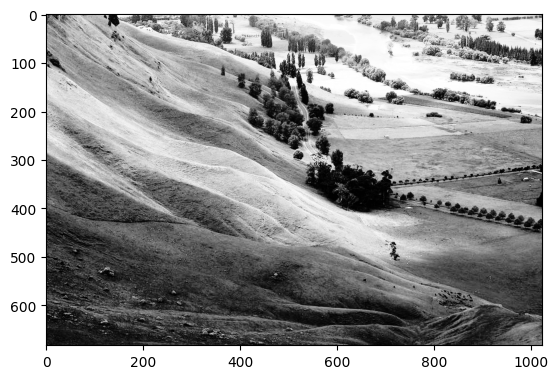

In [79]:

plt.imshow(equalized_img, cmap='gray')